# Simple "Data analysis of the videogames industry" Project

##### Source of the dataset:
https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download

### 1. Opening the dataset in the Jupyter Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("vgsales.csv") 

In [3]:
pd.set_option("display.max_rows", 7)

df     

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


### 2. Index
In most datasets, the index is often the "ID" column because the "ID" values are unique and do not repeat, allowing each row to be uniquely identified. In this dataset, we don't have an "ID" column. Although we might consider using the "Rank" column as the index, it's not ideal because, in reality, two competitors can sometimes have the same rank. <br />
Therefore, we'll create a new column called "id" to serve as the index, ensuring each row has a unique reference in this DataFrame.

In [4]:
df['id'] = range(1, len(df) + 1)
df.set_index('id', inplace=True)

In [73]:
df.head(7)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
id,,,,,,,,,,,
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


### 3. Renaming a column

We rename the column "Other_Sales" into "Other_Countries_Sales"

In [6]:
df.rename(columns={'Other_Sales':'Other_Countries_Sales'}, inplace=True)
df.head(7)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
id,,,,,,,,,,,
1,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
16596,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16597,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16598,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


### 4. Getting the first info from the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   16598 non-null  int64  
 1   Name                   16598 non-null  object 
 2   Platform               16598 non-null  object 
 3   Year                   16327 non-null  float64
 4   Genre                  16598 non-null  object 
 5   Publisher              16540 non-null  object 
 6   NA_Sales               16598 non-null  float64
 7   EU_Sales               16598 non-null  float64
 8   JP_Sales               16598 non-null  float64
 9   Other_Countries_Sales  16598 non-null  float64
 10  Global_Sales           16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### 5. Datatype Conversion

Since "Year" is a "float" Datatype, I want to convert it into a "integer" datatype. 
First let's make sure there are no  NaN (not a number) values:

In [8]:
df['Year'].isna().sum()

271

Since there are 271 NaN values (empty cells, missing values), the conversion into integer wouldn't work. Hence we have to fill the NaN values with "0":

In [9]:
df['Year'] = df['Year'].fillna(0)

Now we can convert the column "Year" from float into integer:

In [10]:
df['Year'] = df['Year'].astype('int')


Now we can see that the variable "Year" has the new datatype "integer":

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   16598 non-null  int64  
 1   Name                   16598 non-null  object 
 2   Platform               16598 non-null  object 
 3   Year                   16598 non-null  int32  
 4   Genre                  16598 non-null  object 
 5   Publisher              16540 non-null  object 
 6   NA_Sales               16598 non-null  float64
 7   EU_Sales               16598 non-null  float64
 8   JP_Sales               16598 non-null  float64
 9   Other_Countries_Sales  16598 non-null  float64
 10  Global_Sales           16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.5+ MB


 ### 6. Summary Statistics on numerical columns

In [12]:
df.describe()    

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
...,...,...,...,...,...,...,...
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### 7. Data analysis: Which games are best sellers?

We create a function that shows the games that are best sellers.

"n" = how many games we want to have displayed in the ranking? Let's say 10

"by" = by which criterium do we want to sort the best videogames?  We chose the criterium "Region"


In [13]:
def best_seller(n, by, ascending = False, min_sales=0):

    df2 = df.loc[(df.Global_Sales>min_sales) & (df.EU_Sales>min_sales) & (df.NA_Sales>min_sales) 
                     & (df.JP_Sales>min_sales) & (df.Other_Countries_Sales>min_sales),  ["Platform", "Genre", "Year",by]].sort_values(by = by, ascending=False).head(n).copy()
    return df2

In [14]:
best_seller(n = 10, by = "JP_Sales")

,Platform,Genre,Year,JP_Sales
id,,,,
5,GB,Role-Playing,1996,10.22
13,GB,Role-Playing,1999,7.20
2,NES,Platform,1985,6.81
...,...,...,...,...
42,DS,Simulation,2005,5.33
28,DS,Puzzle,2005,5.32
9,Wii,Platform,2009,4.70


In [15]:
best_seller(n = 10, by = "EU_Sales")

,Platform,Genre,Year,EU_Sales
id,,,,
1,Wii,Sports,2006,29.02
3,Wii,Racing,2008,12.88
4,Wii,Sports,2009,11.01
...,...,...,...,...
8,Wii,Misc,2006,9.20
5,GB,Role-Playing,1996,8.89
15,Wii,Sports,2009,8.59


In [16]:
best_seller(n = 10, by = "NA_Sales")

,Platform,Genre,Year,NA_Sales
id,,,,
1,Wii,Sports,2006,41.49
2,NES,Platform,1985,29.08
10,NES,Shooter,1984,26.93
...,...,...,...,...
9,Wii,Platform,2009,14.59
8,Wii,Misc,2006,14.03
19,SNES,Platform,1990,12.78


In [17]:
best_seller(n = 10, by = "Other_Countries_Sales")

,Platform,Genre,Year,Other_Countries_Sales
id,,,,
18,PS2,Action,2004,10.57
1,Wii,Sports,2006,8.46
48,PS2,Racing,2004,7.53
...,...,...,...,...
8,Wii,Misc,2006,2.85
11,DS,Simulation,2005,2.75
35,PS3,Shooter,2012,2.52


In [18]:
best_seller(n = 10, by = "Global_Sales")

,Platform,Genre,Year,Global_Sales
id,,,,
1,Wii,Sports,2006,82.74
2,NES,Platform,1985,40.24
3,Wii,Racing,2008,35.82
...,...,...,...,...
8,Wii,Misc,2006,29.02
9,Wii,Platform,2009,28.62
10,NES,Shooter,1984,28.31


### 8. "unique values" and "value counts"

What are the gaming platforms appearing in this dataset?

In [19]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Frequencies of the gaming platforms in the whole dataset: which gaming platforms appear most?

In [20]:
df["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
        ... 
TG16       2
GG         1
PCFX       1
Name: Platform, Length: 31, dtype: int64

Frequencies of the gaming genre in the whole dataset: which genre appear most?

In [21]:
df["Genre"].value_counts()

Action      3316
Sports      2346
Misc        1739
            ... 
Fighting     848
Strategy     681
Puzzle       582
Name: Genre, Length: 12, dtype: int64

## 9. Data Analysis Focused on a Specific Game Franchise: The "Mario" Franchise Games

### 9.1. Creating a New Dataset for "Mario" Franchise Games

As next task we want to get relevant information about all "Mario" games. As first thing we will search for the string "Mario".


In [77]:
pd.set_option("display.max_rows", 10)
mario_games= df.Name.str.contains("Mario")  
df.loc[mario_games, ["Name", "Year", "Platform", "Global_Sales"]]

,Name,Year,Platform,Global_Sales
id,,,,
2,Super Mario Bros.,1985,NES,40.24
3,Mario Kart Wii,2008,Wii,35.82
7,New Super Mario Bros.,2006,DS,30.01
9,New Super Mario Bros. Wii,2009,Wii,28.62
12,Mario Kart DS,2005,DS,23.42
...,...,...,...,...
12771,Dance Dance Revolution: Mario Mix (JP sales),2005,GC,0.06
13274,Detective Conan: Marionette Symphony,2013,3DS,0.05
15262,Mario Tennis,0,3DS,0.02


But the dataframes detects all games that include the combination "mario" inside them, returning non-mario games as well (see row 13274 "Detective Conad: MARIOnette Symphony").<br />
We have to change the search criteria.<br />
In the command below we add a regex, to make sure that the search is only for the word "Mario":

In [23]:
mario_games= df.Name.str.contains(('(?:\s|^|[,;])Mario(?:\s|$|[,;])'))  

Now we obtained exclusively "Mario" games (and we can see that the observations decreased from 113 to 109):

In [78]:
df3 = df.loc[mario_games, ["Name", "Platform"]]
df3.head(7)

,Name,Platform
id,,
2,Super Mario Bros.,NES
3,Mario Kart Wii,Wii
7,New Super Mario Bros.,DS
9,New Super Mario Bros. Wii,Wii
12,Mario Kart DS,DS
19,Super Mario World,SNES
22,Super Mario Land,GB


### 9.2 Graphic representation of "Mario" best sellers with Matplotlib

In [26]:
mario_global_sales =df.loc[mario_games, ["Name", "Global_Sales"]].head(20)
mario_global_sales.set_index("Name", inplace = True)
mario_global_sales

,Global_Sales
Name,
Super Mario Bros.,40.24
Mario Kart Wii,35.82
New Super Mario Bros.,30.01
New Super Mario Bros. Wii,28.62
Mario Kart DS,23.42
...,...
Mario Kart 64,9.87
New Super Mario Bros. 2,9.82
Mario Party DS,9.02


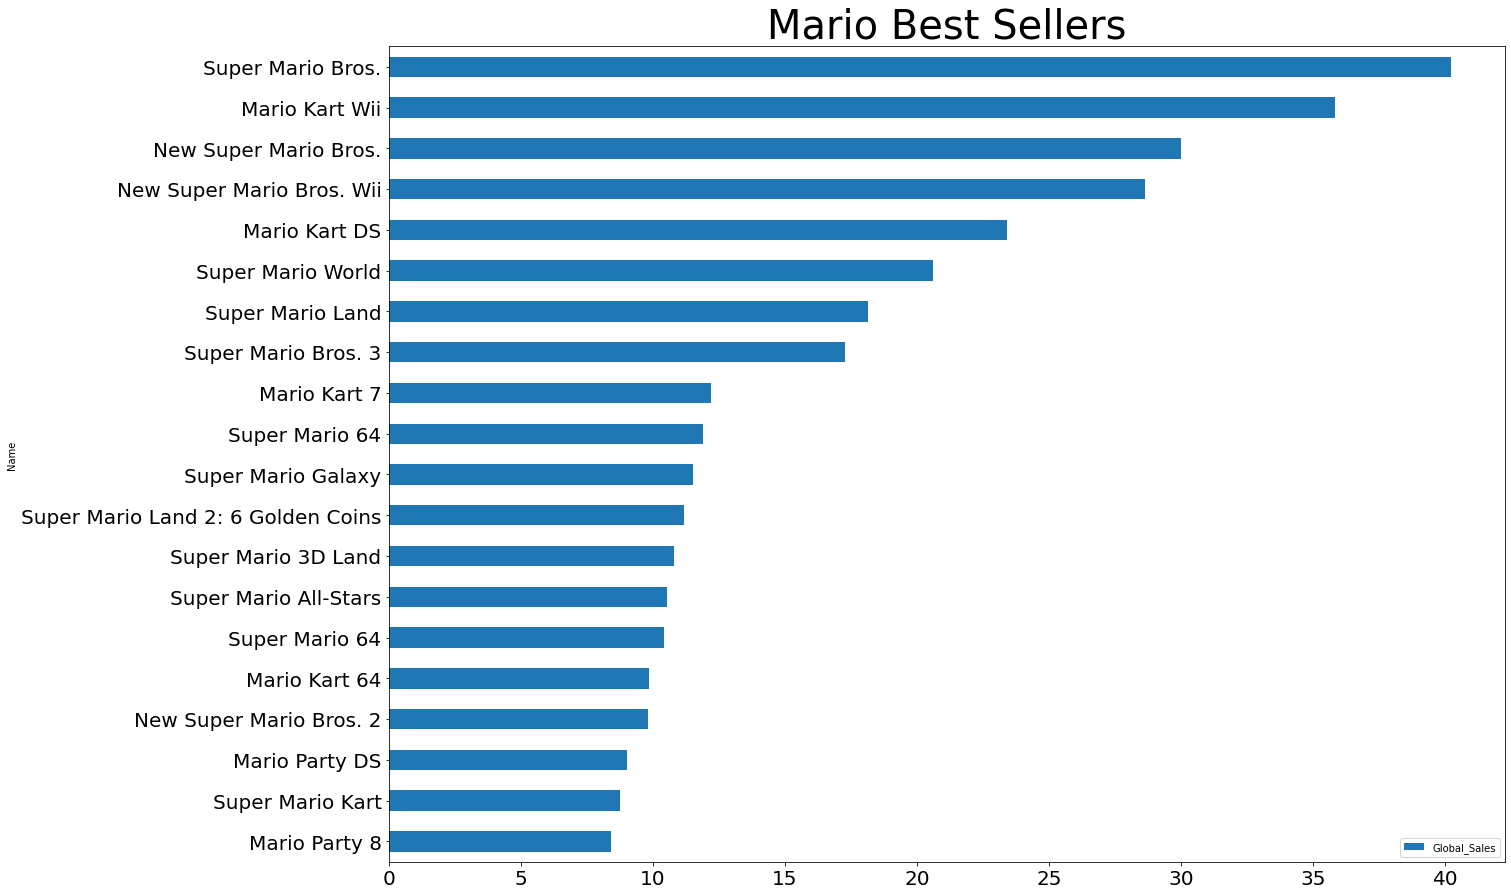

In [28]:
import matplotlib.pyplot as plt
import numpy as np 

mario_global_sales.plot(kind='barh',figsize = (20, 15), width=0.5, fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Mario Best Sellers", fontsize = 40)
plt.gca().invert_yaxis()
plt.show()

### Sales analysis: for which gaming console have been released the most 'Mario' games?

For this analysis we will focus on the columns "Name" and "Platform":

In [79]:
df.head(7)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
id,,,,,,,,,,,
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


We use the dataframe df3 again:

In [34]:
df3

,Name,Platform
id,,
2,Super Mario Bros.,NES
3,Mario Kart Wii,Wii
7,New Super Mario Bros.,DS
9,New Super Mario Bros. Wii,Wii
12,Mario Kart DS,DS
...,...,...
12374,Mario vs. Donkey Kong: Tipping Stars,3DS
12771,Dance Dance Revolution: Mario Mix (JP sales),GC
15262,Mario Tennis,3DS


In [38]:
df4 = df3["Platform"].value_counts()
df4

Wii     16
GBA     16
3DS     14
GC      12
DS      11
        ..
WiiU     9
SNES     8
GB       7
NES      6
2600     1
Name: Platform, Length: 11, dtype: int64

With the value count we saw that the most "Mario" games have been released for the Nintendo Wii, the Gameboy Advance, Nintendo 3DS and Gameboy Color. Now let's make a grafic representation:

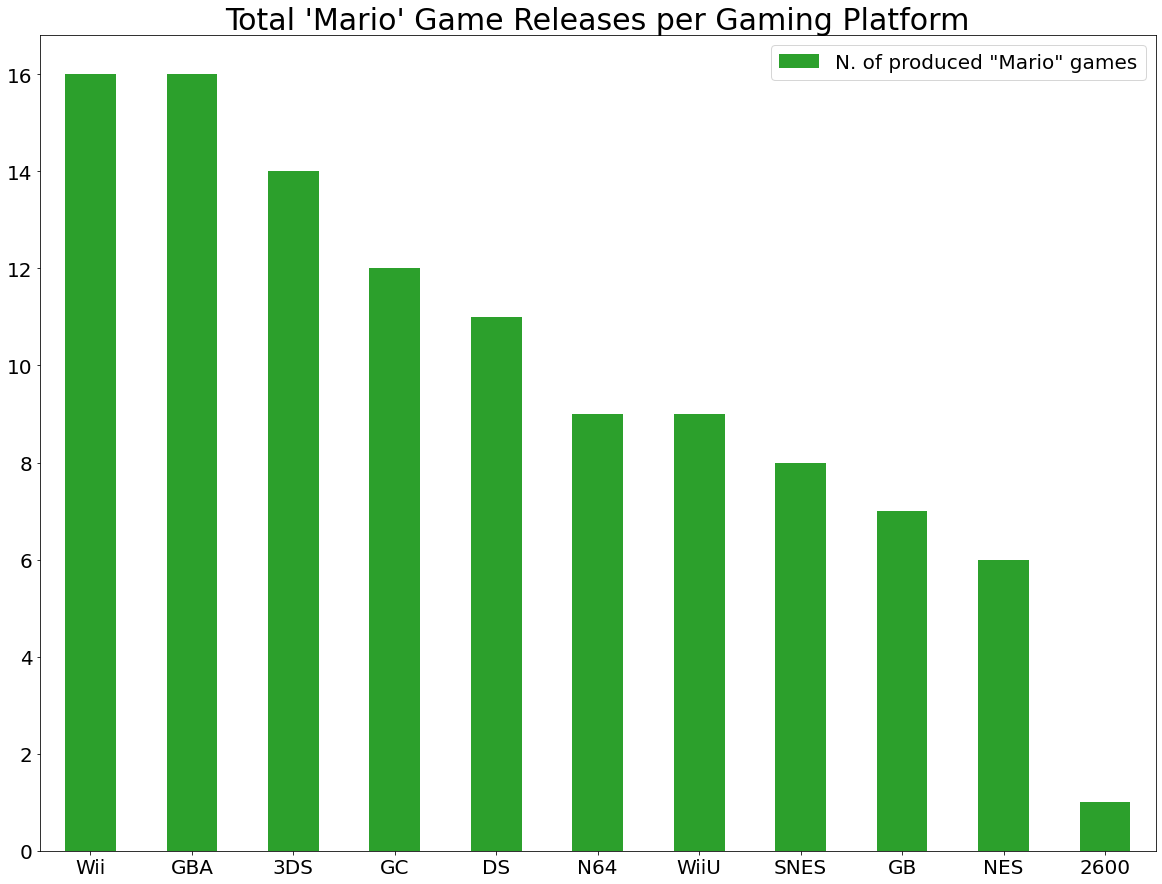

In [71]:
import matplotlib.pyplot as plt
import numpy as np

df4.plot(kind='bar', figsize = (20, 15), width=0.5, fontsize = 20, color= "tab:green")
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Total 'Mario' Game Releases per Gaming Platform", fontsize = 30)
plt.xticks(rotation=0, fontsize=20)
plt.legend(['N. of produced "Mario" games'], fontsize=20, loc='upper right')
plt.show()

### 10. Creative Data Visualization: Wordclouds

Wordclouds are a creative way to visualize data: the more frequent a value in the dataset, the bigger fontsize will be in the wordcloud. <br/>
Let's create the variable "names", which will be a string variable containing all the names of the videogames. These names will be taken from the column "Name" and joined together in one big string. We will use this string for our worldcloud.

In [51]:
names = df.Name
games = " ".join(names)
max_length = 1000 
games_short_output = games[:max_length]
games_short_output

'Wii Sports Super Mario Bros. Mario Kart Wii Wii Sports Resort Pokemon Red/Pokemon Blue Tetris New Super Mario Bros. Wii Play New Super Mario Bros. Wii Duck Hunt Nintendogs Mario Kart DS Pokemon Gold/Pokemon Silver Wii Fit Wii Fit Plus Kinect Adventures! Grand Theft Auto V Grand Theft Auto: San Andreas Super Mario World Brain Age: Train Your Brain in Minutes a Day Pokemon Diamond/Pokemon Pearl Super Mario Land Super Mario Bros. 3 Grand Theft Auto V Grand Theft Auto: Vice City Pokemon Ruby/Pokemon Sapphire Pokemon Black/Pokemon White Brain Age 2: More Training in Minutes a Day Gran Turismo 3: A-Spec Call of Duty: Modern Warfare 3 Pokémon Yellow: Special Pikachu Edition Call of Duty: Black Ops Pokemon X/Pokemon Y Call of Duty: Black Ops 3 Call of Duty: Black Ops II Call of Duty: Black Ops II Call of Duty: Modern Warfare 2 Call of Duty: Modern Warfare 3 Grand Theft Auto III Super Smash Bros. Brawl Call of Duty: Black Ops Animal Crossing: Wild World Mario Kart 7 Halo 3 Grand Theft Auto V P

Now Let's create our Worldcloud:

In [55]:
from wordcloud import WordCloud
games_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(games)
plt.figure(figsize=(16,8))
plt.imshow(games_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

The wordcloud above shows the ancient roman number "II" as biggest result. This is because there are many sequels in the dataset. For the next wordcloud I am going to remove all numbers that are the sequel of a game:

In [72]:
df = df[df["Name"].str.contains("I|II|III|IV|V|1|2|3|4|5|6") == False] 
df.head(7)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
id,,,,,,,,,,,
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [59]:
name = df.Name
games = " ".join(name)
max_length = 1000 
games_short_output = games[:max_length]
games_short_output

'Wii Sports Super Mario Bros. Mario Kart Wii Wii Sports Resort Pokemon Red/Pokemon Blue Tetris New Super Mario Bros. Wii Play New Super Mario Bros. Wii Duck Hunt Nintendogs Mario Kart DS Pokemon Gold/Pokemon Silver Wii Fit Wii Fit Plus Kinect Adventures! Grand Theft Auto: San Andreas Super Mario World Brain Age: Train Your Brain in Minutes a Day Pokemon Diamond/Pokemon Pearl Super Mario Land Pokemon Ruby/Pokemon Sapphire Pokemon Black/Pokemon White Pokémon Yellow: Special Pikachu Edition Call of Duty: Black Ops Pokemon X/Pokemon Y Super Smash Bros. Brawl Call of Duty: Black Ops Animal Crossing: Wild World Mario Kart 7 Pokemon HeartGold/Pokemon SoulSilver Super Mario Galaxy Pokemon Omega Ruby/Pokemon Alpha Sapphire Gran Turismo Super Mario All-Stars Pokemon FireRed/Pokemon LeafGreen Call of Duty: Ghosts Halo: Reach Call of Duty: Ghosts Donkey Kong Country Minecraft Animal Crossing: New Leaf Mario Party DS Super Mario Kart Wii Party Mario Party 8 GoldenEye 007 Mario & Sonic at the Olympi

The following wordcloud makes more sense, because it is not biased by the numbers of the sequel games: 

In [60]:
games_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(games)

plt.figure(figsize=(16,16))
plt.imshow(games_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()